# A guide on how to link Google Drive's file system to Colab
We go through the functions we used to manage and save our data using the Drive, so as to avoid Ram overloads. 



## Downloading single files from anyone's Drive

We use the file sharing link that someone has sent you of some file, for example:

- https://drive.google.com/file/d/1FRILvLUJWzoYKfsf7_cGTP6TL8vzLC3t/view?usp=sharing

Then from that link we remove only the file identifier, by removing google drive's handlers (left) and the link viewer's restriction (right):

- "1FRILvLUJWzoYKfsf7_cGTP6TL8vzLC3t"

Then here we use a downloading method as presented below:

In [ ]:
# import library
from google_drive_downloader import GoogleDriveDownloader as gdd

# we use the file identifier we got above
gdd.download_file_from_google_drive(file_id="1FRILvLUJWzoYKfsf7_cGTP6TL8vzLC3t",
                                    dest_path = '/content/image.jpg', overwrite=True)



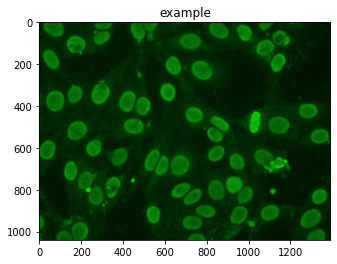

In [ ]:
# using openCV process the image downloaded
import cv2
# read image
img = cv2.imread('/content/image.jpg')
# plot image

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title("example")
plt.show()



## Downloading folders from anyone's Drive
To use the single file downloader, you must first zip the folder you are downloading and then unzip the file, after downloading.

In [ ]:
# we use the file identifier 
# https://drive.google.com/file/d/1CgxNKusz0cR_FC05xJdEoSLopkDXLyFw/view?usp=sharing
gdd.download_file_from_google_drive(file_id="1CgxNKusz0cR_FC05xJdEoSLopkDXLyFw",
                                    dest_path = '/content/prim.zip', overwrite=True)

The code to unzip folders when using the single file downloader:

In [ ]:
# library 
import zipfile

# use the same file path of the dest_path above
with zipfile.ZipFile('/content/prim.zip', 'r') as zip_ref:
# path to where the extracted files must go to
    zip_ref.extractall('/content/')


The folder that was downloaded was a folder of a pattern called DFS70, which we can go through the files' names using the glob library:


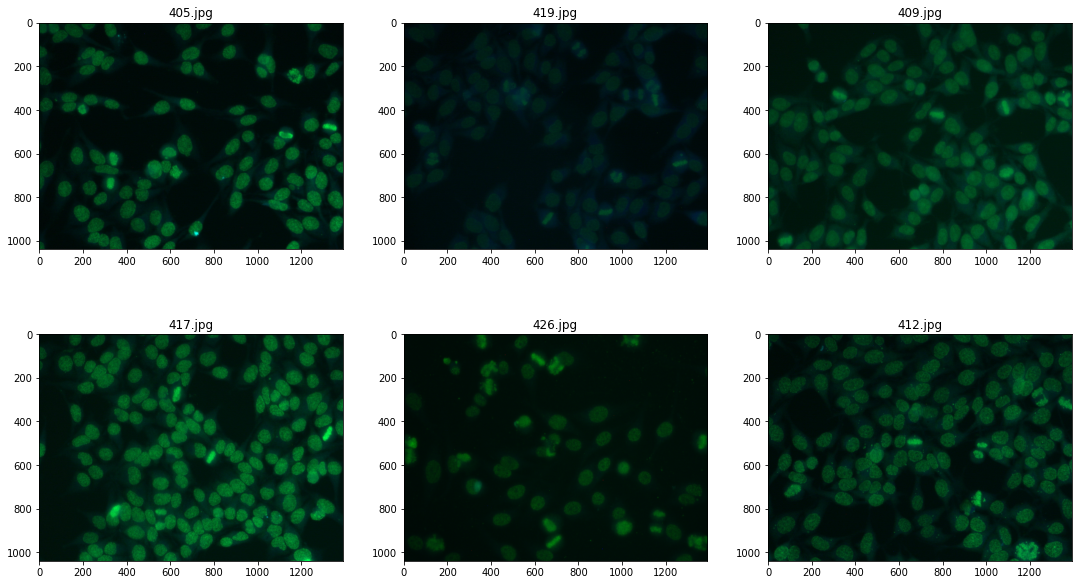

In [ ]:
import glob
# go through the folder
# and get the file path for all the images in that folder
# then plot them
cont = 0
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for filename in glob.glob('/content/DFS70/*'): 
    if cont < 6:
      i = cont % 3
      j = cont // 3
      img = cv2.imread(filename)
      axs[j, i].imshow(img)
      axs[j, i].set_title(filename[len('/content/DFS70/'):])
      # plot image
      cont += 1
#for ax in axs.flat:
#ax.set(xlabel='x-label', ylabel='y-label')

plt.show()

## Connecting the drive
Another alternative is to connect the entire drive of files and work directly on them by aplying this code:


In [ ]:
# import library
from google.colab import drive

#mount the drive
drive.mount('/content/drive')
# go to the url and get the password for the drive


Mounted at /content/drive


After the drive has been linked, all the folders of the drive will be available at the path:
- '/content/drive/MyDrive'

Path to save in drive can be found easily by clicking files on left side, navigating to folder and right click to choose Copy path. This will save the path of the folder in Google Drive.

Then you can easily save a file by traditional methods by putting the filepath to the place in the drive you wish to save into:


In [ ]:
 import numpy as np
 np.save('/content/drive/MyDrive/Examples/img.npy', np.asarray(img))
 cv2.imwrite('/content/drive/My Drive/Examples/img.jpg' , img)


True

Or use he copy command:
Using copy command
This was not asked but can be useful. 
Assuming /content/img.png is image path and /content/drive/My Drive/Delete is destination.

Alternate option is write image in colab and copy to drive using 
- !cp "/content/res.png" "/content/drive/My Drive/Delete" 
after drive mount.

## Alternative for saving from shared link on drive
First of all you have to share a google drive folder in "edit" mode, for example: https://drive.google.com/drive/folders/1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ?usp=sharing (the link is not valid, it's just an example)

The id you need to copy into the code is: 1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ

In [ ]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' res.png

# if multiple images
# !gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png